<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/DeepLearning/Assignment_41/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Conv2D ,MaxPooling2D , Flatten
import matplotlib.pyplot as plt


In [4]:
dataset = tf.keras.datasets.cifar10
(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()
(x_train, y_train) , (x_test, y_test) = dataset.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
print(X_train.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)

(50000, 32, 32, 3)
0 255 uint8
0 9 uint8


[5]


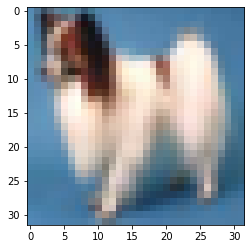

In [6]:
plt.imshow(X_train[4000] )
print(Y_train[4000])

**MPL (Machine Learning) For mnist** 




In [7]:
X_train = X_train.reshape(50000,3072)
#print(X_train.shape)

In [8]:

model = tf.keras.models.Sequential([
        Dense(64, input_dim = 3072, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax'),
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [10]:
model.fit(X_train, Y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 10.0386 - accuracy: 0.1155
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.0966
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3024 - accuracy: 0.0987
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0966


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
X_test = X_test.reshape(10000,3072)

In [14]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0999


[2.3026976585388184, 0.09989999979734421]

**CNN + MLP (Deep Learning) For mnist**

In [15]:
x_train , x_test = x_train /255.0 , x_test / 255.0

In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],3)


print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [17]:
model = tf.keras.models.Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(64,activation='relu'),
        Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [19]:
model.fit(x_train , y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4700 - accuracy: 0.4676
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0837 - accuracy: 0.6160
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9299 - accuracy: 0.6757
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8290 - accuracy: 0.7106
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7453 - accuracy: 0.7408


In [20]:
Accuracy = model.evaluate(x_test , y_test)
print ("Deep Accuracy ==========>" , Accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.8872 - accuracy: 0.6975
Deep Accuracy ==========> [0.8871520757675171, 0.6974999904632568]
